In [18]:
import os.path as op
import numpy as np
import pandas as pd

from pyglmnet import GLMCV
from spykes.ml.strf import STRF

import matplotlib.pyplot as plt
from tempfile import TemporaryDirectory
from sklearn.model_selection import train_test_split # noqa
from pyglmnet.datasets import fetch_tikhonov_data


In [95]:
np.random.randint(100)

11

In [150]:
T = 200
J = 3
x = np.zeros((T,J))
for j in np.arange(1,J):
    x_tmp = np.zeros((T,))
    for m in np.arange(1,5):
        omega = np.arange(1,T+1)/(np.pi/m) + np.random.randint(25)
        x_m   = np.sin(omega);
        x_m   = x_m / 1 + x_m
        x_tmp = 1.0*(x_m > 1.9 ) + x_tmp
    x[:,j] = x_tmp


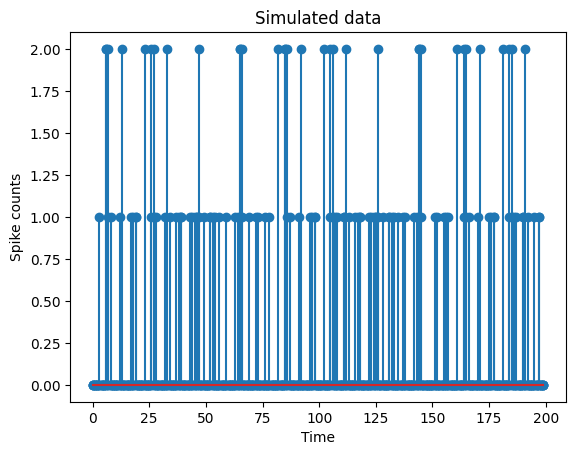

In [197]:
plt.stem(x[:,0])
for j in np.arange(0,3):
    plt.stem(x[:,j])
    plt.title("Simulated data")
    plt.xlabel("Time")
    plt.ylabel("Spike counts")

In [198]:
# Create design matrix
H = 1
Y = x[H:,:]
X = x[0:T-1,:]
print(np.shape(X))
print(np.shape(Y))
# set up the lasso model, an alpha of 1.0 corresponds to lasso regularization
glm = GLMCV(distr="poisson", tol=1e-3,
            score_metric="pseudo_R2",
            alpha=1.0, learning_rate=3, max_iter=100, cv=3, verbose=True)

print("glm: ", glm)
THETAS = np.zeros((J*H+1,J))
for j in np.arange(0,J):
    glm_est = glm.fit(X, Y[:,j]);
    THETAS[:,j] = np.append(glm_est.beta_,glm_est.beta0_);
    print(THETAS)

Looping through the regularization path
Lambda: 0.5000
Lambda: 0.5000
	Parameter update tolerance. Converged in 10 iterations
Lambda: 0.5000
Lambda: 0.5000
Lambda: 0.5000
Lambda: 0.3237
Lambda: 0.3237
	Parameter update tolerance. Converged in 48 iterations
Lambda: 0.3237
	Parameter update tolerance. Converged in 48 iterations
Lambda: 0.3237
	Parameter update tolerance. Converged in 48 iterations
Lambda: 0.3237
	Parameter update tolerance. Converged in 48 iterations
Lambda: 0.2096
Lambda: 0.2096
	Parameter update tolerance. Converged in 2 iterations
Lambda: 0.2096
	Parameter update tolerance. Converged in 2 iterations
Lambda: 0.2096
	Parameter update tolerance. Converged in 2 iterations
Lambda: 0.2096
	Parameter update tolerance. Converged in 2 iterations
Lambda: 0.1357
Lambda: 0.1357
	Parameter update tolerance. Converged in 2 iterations
Lambda: 0.1357
	Parameter update tolerance. Converged in 2 iterations
Lambda: 0.1357
	Parameter update tolerance. Converged in 2 iterations
Lambda: 0.

(199, 3)
(199, 3)
glm:  <
Distribution | poisson
alpha | 1.00
max_iter | 100.00
lambda: 0.50 to 0.01
>
[[-0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [-5.83002469  0.          0.        ]]


Lambda: 0.0879
Lambda: 0.0879
	Parameter update tolerance. Converged in 7 iterations
Lambda: 0.0879
Lambda: 0.0879
Lambda: 0.0879
	Parameter update tolerance. Converged in 18 iterations
Lambda: 0.0569
Lambda: 0.0569
	Parameter update tolerance. Converged in 8 iterations
Lambda: 0.0569
Lambda: 0.0569
Lambda: 0.0569
	Parameter update tolerance. Converged in 24 iterations
Lambda: 0.0368
Lambda: 0.0368
	Parameter update tolerance. Converged in 10 iterations
Lambda: 0.0368
Lambda: 0.0368
Lambda: 0.0368
Lambda: 0.0239
Lambda: 0.0239
	Parameter update tolerance. Converged in 16 iterations
Lambda: 0.0239
Lambda: 0.0239
Lambda: 0.0239
Lambda: 0.0154
Lambda: 0.0154
	Parameter update tolerance. Converged in 46 iterations
Lambda: 0.0154
Lambda: 0.0154
Lambda: 0.0154
Lambda: 0.0100
Lambda: 0.0100
	Parameter update tolerance. Converged in 48 iterations
Lambda: 0.0100
Lambda: 0.0100
Lambda: 0.0100
Looping through the regularization path
Lambda: 0.5000
Lambda: 0.5000
	Parameter update tolerance. Conve

[[-0.         -0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.28511044  0.        ]
 [-5.83002469 -1.00472023  0.        ]]


Lambda: 0.0239
Lambda: 0.0239
Lambda: 0.0154
Lambda: 0.0154
Lambda: 0.0154
Lambda: 0.0154
Lambda: 0.0154
Lambda: 0.0100
Lambda: 0.0100
Lambda: 0.0100
Lambda: 0.0100
Lambda: 0.0100


[[-0.         -0.         -0.        ]
 [ 0.          0.          0.24154999]
 [ 0.          0.28511044 -0.        ]
 [-5.83002469 -1.00472023 -1.03766379]]


In [199]:
print(THETAS)

[[-0.         -0.         -0.        ]
 [ 0.          0.          0.24154999]
 [ 0.          0.28511044 -0.        ]
 [-5.83002469 -1.00472023 -1.03766379]]


In [201]:
THETAS[:,1]

array([-0.        ,  0.        ,  0.28511044, -1.00472023])